## [100 birds](https://www.kaggle.com/gpiosenka/100-bird-species)

In [1]:
import os
import random
import numpy as np
import torch
import torchvision

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

In [ ]:
!unzip 100-bird-species.zip

In [3]:
base_dir = '.'

In [4]:
data_dir = base_dir

classes = os.listdir(data_dir + "/train")
print(classes)
print(len(classes))

['RED FODY', 'ORIENTAL BAY OWL', 'WATTLED LAPWING', 'BLUE HERON', 'HIMALAYAN BLUETAIL', 'KING VULTURE', 'ECUADORIAN HILLSTAR', 'NORTHERN FLICKER', 'CRESTED OROPENDOLA', 'AZURE TIT', 'HAWFINCH', 'BLACK AND YELLOW BROADBILL', 'DOWNY WOODPECKER', 'CAPPED HERON', 'YELLOW BELLIED FLOWERPECKER', 'AFRICAN FIREFINCH', 'BUFFLEHEAD', 'CAPE LONGCLAW', 'CANVASBACK', 'SAYS PHOEBE', 'ORANGE BRESTED BUNTING', 'BARN SWALLOW', 'FOREST WAGTAIL', 'HOODED MERGANSER', 'WRENTIT', 'RUDDY SHELDUCK', 'RED WINGED BLACKBIRD', 'GREAT TINAMOU', 'OSTRICH', 'COMMON FIRECREST', 'TASMANIAN HEN', 'HORNED SUNGEM', 'EASTERN ROSELLA', 'BUSH TURKEY', 'PARADISE TANAGER', 'CAPE GLOSSY STARLING', 'GREY PLOVER', 'BORNEAN LEAFBIRD', 'LITTLE AUK', 'TAILORBIRD', 'CRESTED NUTHATCH', 'GOLD WING WARBLER', 'YELLOW CACIQUE', 'AZURE BREASTED PITTA', 'HARLEQUIN QUAIL', 'ARARIPE MANAKIN', 'TAIWAN MAGPIE', 'COMMON IORA', 'BALD EAGLE', 'BLACK BREASTED PUFFBIRD', 'BLOOD PHEASANT', 'KIWI', 'GOLDEN EAGLE', 'BLACK COCKATO', 'INDIAN VULTURE', '

## [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder)

In [5]:
dataset = torchvision.datasets.ImageFolder(data_dir+'/train')

In [6]:
print(type(dataset))

# tuple: (image, target)

<class 'torchvision.datasets.folder.ImageFolder'>


In [7]:
print(len(dataset))

84635


In [8]:
n = 200
data, target = dataset[n]

In [9]:
print(type(data))

<class 'PIL.Image.Image'>


In [10]:
print(data.mode, data.width, data.height)

RGB 224 224


In [11]:
print(type(target))

<class 'int'>


In [12]:
print(set(dataset.targets))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

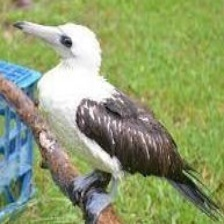

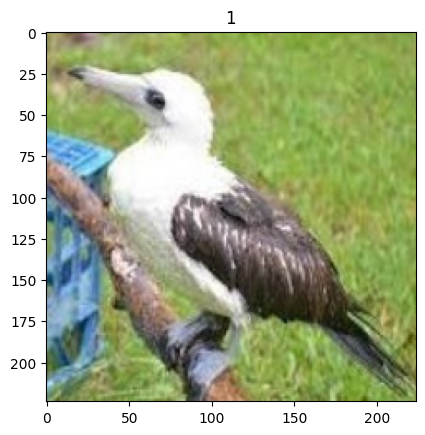

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data)
data.show()

In [14]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
compose = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.ImageFolder(data_dir+'/train', transform=compose)

In [15]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 3, 224, 224])
torch.Size([3, 224, 224])


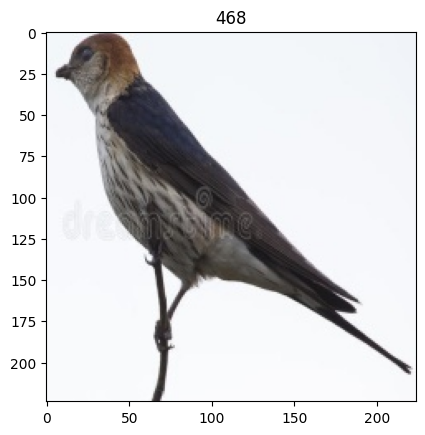

In [16]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic)
    plt.show()
    break

In [17]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 3, 224, 224])
torch.Size([3, 224, 224])


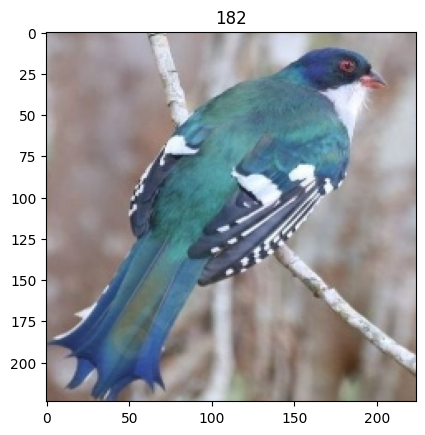

In [18]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(pic)
    plt.show()
    break

In [19]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [20]:
import torchvision.transforms as transforms
compose_train = transforms.Compose([
                      transforms.Resize((224, 224)),
                      transforms.RandomHorizontalFlip(),
                      transforms.RandomRotation(10),
                      transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                      transforms.ToTensor(),
                      transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                      ])
compose_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

train_data = torchvision.datasets.ImageFolder(data_dir+'/train', transform=compose_train)
test_data = torchvision.datasets.ImageFolder(data_dir+'/test', transform=compose_train)

In [21]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 84635
test sets: 2625


In [22]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [23]:
import torchvision.models as models

model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.l1 = nn.Linear(512, 525)

nn.init.kaiming_normal_(model.l1.weight)

model.fc = nn.Sequential(nn.BatchNorm1d(512),
                         nn.Dropout(0.5),
                         model.l1
                      )
model = model.to(device)

/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 3, 224, 224])
tensor([[-0.8383, -1.0417,  3.6150,  ...,  2.3633, -0.6703,  0.3478],
        [-1.5958,  3.4036, -0.5743,  ..., -1.7028, -0.0454, -0.6708],
        [ 5.4470,  0.1312, -0.0318,  ..., -0.1823,  0.3143,  1.5378],
        ...,
        [-1.9507, -0.4328, -1.5764,  ..., -1.9978, -2.6569,  1.5750],
        [ 1.9129, -1.8756, -1.1817,  ..., -1.9512,  2.8912,  1.4469],
        [-0.7683,  3.5069, -1.9861,  ...,  1.1627,  3.9444, -4.4401]],
       device='cuda:0')
tensor([ 19, 391, 325,  59,  33,  79, 416,  54, 254, 268]) tensor([419,  98, 132, 365, 443, 410, 376, 200, 121, 235])


In [25]:
BATCH_SIZE = 200

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [26]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 5 # 5회 학습

list_training_loss = []
list_test_loss = []
batch_length = int(len(train_data) / BATCH_SIZE)

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_d, train_t in train_loader:
        train_d = train_d.to(device)
        train_t = train_t.to(device)
        y = model(train_d)
        del train_d
        loss = criterion(y, train_t).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_t
        if( n_train % 50 == 0 ):
          print('epoch {}th: {}/{} loss - {}'.format(epoch, n_train, batch_length, loss.data.cpu().numpy().sum()))


    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_d, test_t in test_loader:
        test_d = test_d.to(device)
        test_t = test_t.to(device)
        y_pred = model(test_d)
        idx_pred = torch.max(y_pred, 1)[1]
        del test_d
        loss = criterion(y_pred, test_t).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_t)
        correct += (idx_pred == test_t).sum()

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch + 1, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th: 50/423 loss - 6.206305503845215
epoch 0th: 100/423 loss - 4.940506935119629
epoch 0th: 150/423 loss - 4.15642786026001
epoch 0th: 200/423 loss - 3.4321303367614746
epoch 0th: 250/423 loss - 3.1434383392333984
epoch 0th: 300/423 loss - 2.8596816062927246
epoch 0th: 350/423 loss - 2.4922614097595215
epoch 0th: 400/423 loss - 2.395231246948242
epoch 1th training loss: 3.980188451285632 test loss: 1.2143662061010088, accuracy: 75.96190643310547
epoch 1th: 50/423 loss - 1.863573431968689
epoch 1th: 100/423 loss - 2.236544370651245
epoch 1th: 150/423 loss - 1.5654568672180176
epoch 1th: 200/423 loss - 1.7505362033843994
epoch 1th: 250/423 loss - 1.8399015665054321
epoch 1th: 300/423 loss - 1.601759910583496
epoch 1th: 350/423 loss - 1.3654648065567017
epoch 1th: 400/423 loss - 1.4981818199157715
epoch 2th training loss: 1.7837761331279323 test loss: 0.7618901899882725, accuracy: 83.35237884521484
epoch 2th: 50/423 loss - 1.5864349603652954
epoch 2th: 100/423 loss - 1.2387297153472

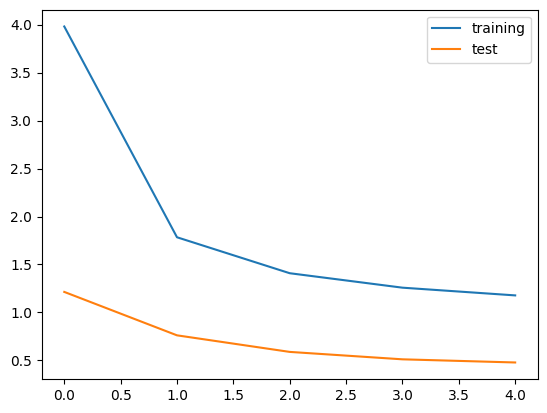

In [27]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()